# Practice notebook for regression analysis with NHANES

This notebook will give you the opportunity to perform some
regression analyses with the NHANES data that are similar to
the analyses done in the week 2 case study notebook.

You can enter your code into the cells that say "enter your code here",
and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar
to code that appears in the case study notebook.  You will need
to edit code from that notebook in small ways to adapt it to the
prompts below.

To get started, we will use the same module imports and
read the data in the same way as we did in the case study:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

url = "https://raw.githubusercontent.com/kshedden/statswpy/master/NHANES/merged/nhanes_2015_2016.csv"
da = pd.read_csv(url)

# Drop unused columns, drop rows with any missing values.
vars = ["BPXSY1", "RIDAGEYR", "RIAGENDR", "RIDRETH1", "DMDEDUC2", "BMXBMI", "SMQ020"]
da = da[vars].dropna()

## Question 1:

Use linear regression to relate the expected body mass index (BMI) to a person's age.

In [2]:
# enter your code here

### OLS Model of BMXBMI with RIDAGEYR
model = sm.OLS.from_formula("BMXBMI ~ RIDAGEYR", data=da)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BMXBMI   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.720
Date:                Fri, 24 Mar 2023   Prob (F-statistic):             0.0991
Time:                        16:15:13   Log-Likelihood:                -17149.
No. Observations:                5102   AIC:                         3.430e+04
Df Residuals:                    5100   BIC:                         3.432e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.0564      0.290    100.143      0.000      28.488      29.625
RIDAGEYR       0.0091      0.006      1.649      0.099      -0.002       0.020
==============================================================================
Omnibus:                      936.202   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1857.656
Skew:                           1.105   Prob(JB):                         0.00
Kurtosis:                       4.964   Cond. No.                         156.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [3]:
r_squared = da[["BMXBMI", "RIDAGEYR"]].corr()
r_squared

,BMXBMI,RIDAGEYR
BMXBMI,1.000000,0.023089
RIDAGEYR,0.023089,1.000000


__Q1a.__ According to your fitted model, do older people tend to have higher or lower BMI than younger people?

higher as with each increase in unit age, the bmi increases by 0.0091 units

__Q1b.__ Based your analysis, are you confident that there is a relationship between BMI and age in the population that NHANES represents?

considering the p value and the coefficient, it is not significant as the age coeff is less than the p value. <br>
so there is no strong evidence that the BMI increases by 0.0091 for each unit increase in age.

__Q1c.__ By how much does the average BMI of a 40 year old differ from the average BMI of a 20 year old?

0.0091 * 20 = 0.181

__Q1d.__ What fraction of the variation of BMI in this population is explained by age?

## Question 2: 

Add gender and ethnicity as additional control variables to your linear model relating BMI to age.  You will need to recode the ethnic groups based
on the values in the codebook entry for [RIDRETH1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDRETH1).

In [4]:
# enter your code here

model = sm.OLS.from_formula("BPXSY1 ~ RIDAGEYR + BMXBMI + RIAGENDR + RIDRETH1", data=da)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BPXSY1   R-squared:                       0.229
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     377.6
Date:                Fri, 24 Mar 2023   Prob (F-statistic):          3.04e-285
Time:                        16:15:13   Log-Likelihood:                -21460.
No. Observations:                5102   AIC:                         4.293e+04
Df Residuals:                    5097   BIC:                         4.296e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     97.3109      1.510     64.439      0.000      94.350     100.271
RIDAGEYR       0.4719      0.013     36.642      0.000       0.447       0.497
BMXBMI         0.3159      0.033      9.545      0.000       0.251       0.381
RIAGENDR      -3.5653      0.457     -7.806      0.000      -4.461      -2.670
RIDRETH1       0.3523      0.179      1.963      0.050       0.000       0.704
==============================================================================
Omnibus:                      746.923   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1758.621
Skew:                           0.842   Prob(JB):                         0.00
Kurtosis:                       5.332   Cond. No.                         401.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Q2a.__ How did the mean relationship between BMI and age change when you added additional covariates to the model?

The mean relationship b/w BMI and age reduced after adding more covariates to the model.

__Q2b.__ How did the standard error for the regression parameter for age change when you added additional covariates to the model?

it reduced by 0.001 units

__Q2c.__ How much additional variation in BMI is explained by age, gender, and ethnicity that is not explained by age alone?

0.054 units of R squared

__Q2d.__ What reference level did the software select for the ethnicity variable?

Mexican American

__Q2e.__ What is the expected difference between the BMI of a 40 year-old non-Hispanic black man and a 30 year-old non-Hispanic black man?

-4.499

__Q2f.__ What is the expected difference between the BMI of a 50 year-old Mexican American woman and a 50 year-old non-Hispanic black man?

0.065 units

## Question 3: 

Randomly sample 25% of the NHANES data, then fit the same model you used in question 2 to this data set.

In [5]:
# enter your code here
da.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5102 entries, 0 to 5734
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BPXSY1    5102 non-null   float64
 1   RIDAGEYR  5102 non-null   int64  
 2   RIAGENDR  5102 non-null   int64  
 3   RIDRETH1  5102 non-null   int64  
 4   DMDEDUC2  5102 non-null   float64
 5   BMXBMI    5102 non-null   float64
 6   SMQ020    5102 non-null   int64  
dtypes: float64(3), int64(4)
memory usage: 318.9 KB


In [6]:
5102/4
df = da.sample(n=1276)
df = da.sample(frac = 0.25)

# enter your code here
model = sm.OLS.from_formula("BMXBMI ~ RIDAGEYR + RIAGENDR + RIDRETH1", data=df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BMXBMI   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     15.28
Date:                Fri, 24 Mar 2023   Prob (F-statistic):           9.03e-10
Time:                        16:15:13   Log-Likelihood:                -4231.1
No. Observations:                1276   AIC:                             8470.
Df Residuals:                    1272   BIC:                             8491.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.1803      0.929     32.500      0.000      28.359      32.002
RIDAGEYR       0.0203      0.011      1.930      0.054      -0.000       0.041
RIAGENDR       0.6029      0.375      1.607      0.108      -0.133       1.339
RIDRETH1      -0.8998      0.146     -6.183      0.000      -1.185      -0.614
==============================================================================
Omnibus:                      187.052   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.139
Skew:                           0.966   Prob(JB):                     5.49e-67
Kurtosis:                       4.417   Cond. No.                         274.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Q3a.__ How do the estimated regression coefficients and their standard errors compare between these two models?  Do you see any systematic relationship between the two sets of results?

The standard errors of the new df with 25% of the columns are twice as high

## Question 4:

Generate a scatterplot of the residuals against the fitted values for the model you fit in question 2.

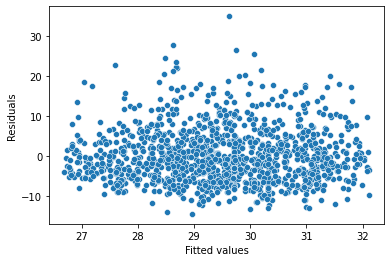

In [7]:
# enter your code here
pp = sns.scatterplot(x = result.fittedvalues, y = result.resid)
pp.set_xlabel("Fitted values")
_ = pp.set_ylabel("Residuals")

__Q4a.__ What mean/variance relationship do you see?

## Question 5: 

Generate a plot showing the fitted mean BMI as a function of age for Mexican American men.  Include a 95% simultaneous confidence band on your graph.

In [8]:
# enter your code here

__Q5a.__ According to your graph, what is the longest interval starting at year 30 following which the mean BMI could be constant?  *Hint:* What is the longest horizontal line starting at age 30 that remains within the confidence band?

__Q5b.__ Add an additional line and confidence band to the same plot, showing the relationship between age and BMI for Mexican American women.  At what ages do these intervals not overlap?

## Question 6:

Use an added variable plot to assess the linearity of the relationship between BMI and age (when controlling for gender and ethnicity).

In [9]:
# enter your code here

__Q6a.__ What is your interpretation of the added variable plot?

## Question 7: 

Generate a binary variable reflecting whether a person has had at least 12 drinks in their lifetime, based on the [ALQ110](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/ALQ_I.htm#ALQ110) variable in NHANES.  Calculate the marginal probability, odds, and log odds of this variable for women and for men.  Then calculate the odds ratio for females relative to males.

In [10]:
# enter your code here

__Q7a.__ Based on the log odds alone, do more than 50% of women drink alcohol?

__Q7b.__ Does there appear to be an important difference between the alcohol use rate of women and men?

## Question 8: 

Use logistic regression to express the log odds that a person drinks (based on the binary drinking variable that you constructed above) in terms of gender.

In [11]:
# enter your code here

__Q8a.__ Is there statistical evidence that the drinking rate differs between women and men?  If so, in what direction is there a difference?

__Q8b.__ Confirm that the log odds ratio between drinking and smoking calculated using the logistic regression model matches the log odds ratio calculated directly in question 6.

## Question 9: 

Use logistic regression to relate drinking to age, gender, and education.

In [12]:
# enter your code here

__Q9a.__ Which of these predictor variables shows a statistically significant association with drinking?

__Q9b.__ What is the odds of a college educated, 50 year old woman drinking?

__Q9c.__ What is the odds ratio between the drinking status for college graduates and high school graduates (with no college), holding gender and age fixed?

__Q9d.__ Did the regression parameter for gender change to a meaningful degree when age and education were added to the model?

## Question 10:

Construct a CERES plot for the relationship between drinking and age (using the model that controls for gender and educational attainment).

In [13]:
# enter your code here

__Q10a.__ Does the plot indicate any major non-linearity in the relationship between age and the log odds for drinking?